# 2019년 사망 교통사고 분석 및 시각화


*   어느 지역이 가장 많은 사망 교통사고가 발생 했었나
*   어느 시간대에 가장 많은 교통사고가 발생 했었나
*   교통사고 위치와 우리집 위치 거리는 얼마나 될까? 우리집 위치와 가까운 곳에 교통사고가 발생 했었나?



## 1.데이터 준비하기


*   https://www.data.go.kr/data/15070340/fileData.do
*   도로교통공단에서 제공하는 사망 교통사고 데이터



###패키지 설치

In [1]:
!pip install  koreanize-matplotlib

### 패키지 임포트

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib

import folium

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ABC/도로교통공단_교통사고 정보_2019.csv', encoding='euc-kr')
df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


### 데이터 확인하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

## 2.사망 교통사고 데이터 전처리

### 원본 데이터 복사하기

In [5]:
accident_df = df.copy()
accident_df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506


### 발생년월일시 컬럼에서 시간 파생 컬럼 만들기

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

In [7]:
# 사망 교통사고가 가장 많이 발생한 시간은?
# 발생년월일시 -> 시간 추출 -> 뒤에 두자리(00~23) -> 파생 컬럼으로 따로 분리
# 2019010121 -> 21 -> 분리할 수 있는 키워드 없음 -> 문자열 슬라이싱

# 1) 문자열 슬라이싱 하고 싶으면 문자열로 타입 변경 (int형의 컬럼을 string 형변환)

accident_df = accident_df.astype({'발생년월일시': 'string'})
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   string 
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

In [8]:
# 2) 시간으로 분리한 데이터를 발생시킨 컬럼에 담기
accident_df['발생시간'] = accident_df['발생년월일시'].str[-2:]
accident_df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,00
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,03
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,16
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,19
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,21


In [9]:
# 3) 발생시간 컬럼을 숫자 데이터 타입으로 변경
accident_df = accident_df.astype({'발생시간': 'int'})
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   string 
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

### 발생년월일시 컬럼에서 발생년월일 파생 컬럼 만들기

In [10]:
# 발생년월일시(string) -> 발생년월일(날짜타입, datetime) 변경

accident_df['발생년월일'] = pd.to_datetime(accident_df['발생년월일시'].str[:-2],
                                      format='%Y%m%d', errors='raise')
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         3233 non-null   int64         
 1   발생년월일시      3233 non-null   string        
 2   주야          3233 non-null   object        
 3   요일          3233 non-null   object        
 4   사망자수        3233 non-null   int64         
 5   부상자수        3233 non-null   int64         
 6   중상자수        3233 non-null   int64         
 7   경상자수        3233 non-null   int64         
 8   부상신고자수      3233 non-null   int64         
 9   발생지시도       3233 non-null   object        
 10  발생지시군구      3233 non-null   object        
 11  사고유형_대분류    3233 non-null   object        
 12  사고유형_중분류    3233 non-null   object        
 13  사고유형        3233 non-null   object        
 14  가해자법규위반     3233 non-null   object        
 15  도로형태_대분류    3233 non-null   object        
 16  도로형태        3233 non-nul

### 필요 없는 컬럼 삭제 및 컬럼 정리

In [11]:
# 1) 필요 없는 컬럼 삭제
del accident_df['발생년월일시']
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         3233 non-null   int64         
 1   주야          3233 non-null   object        
 2   요일          3233 non-null   object        
 3   사망자수        3233 non-null   int64         
 4   부상자수        3233 non-null   int64         
 5   중상자수        3233 non-null   int64         
 6   경상자수        3233 non-null   int64         
 7   부상신고자수      3233 non-null   int64         
 8   발생지시도       3233 non-null   object        
 9   발생지시군구      3233 non-null   object        
 10  사고유형_대분류    3233 non-null   object        
 11  사고유형_중분류    3233 non-null   object        
 12  사고유형        3233 non-null   object        
 13  가해자법규위반     3233 non-null   object        
 14  도로형태_대분류    3233 non-null   object        
 15  도로형태        3233 non-null   object        
 16  가해자_당사자종별   3233 non-nul

In [12]:
# 2) 컬럼 순서 정리 발생년, 발생년월일, 발생시간, ...

# 2-1) 컬럼명을 리스트로 만들기
col1 = accident_df.columns[-2:].to_list()
col1.reverse()

col2 = accident_df.columns[1:-2].to_list()
col2

col_list = col1 + col2
col_list.insert(0, '발생년') # 끼어들기
col_list

['발생년',
 '발생년월일',
 '발생시간',
 '주야',
 '요일',
 '사망자수',
 '부상자수',
 '중상자수',
 '경상자수',
 '부상신고자수',
 '발생지시도',
 '발생지시군구',
 '사고유형_대분류',
 '사고유형_중분류',
 '사고유형',
 '가해자법규위반',
 '도로형태_대분류',
 '도로형태',
 '가해자_당사자종별',
 '피해자_당사자종별',
 '발생위치X_UTMK',
 '발생위치Y_UTMK',
 '경도',
 '위도']

In [13]:
# 2-2) 원하는 컬럼의 순서대로 추출 후 다시 담기
accident_df = accident_df[col_list]
accident_df

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019-01-01,0,야,화,1,0,0,0,0,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019-01-01,3,야,화,1,0,0,0,0,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019-01-01,16,주,화,1,0,0,0,0,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019-01-01,19,야,화,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019-01-01,21,야,화,1,0,0,0,0,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019-12-31,5,야,화,1,0,0,0,0,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019-12-31,8,주,화,1,1,0,1,0,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019-12-31,12,주,화,1,1,0,0,1,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019-12-31,12,주,화,1,1,0,1,0,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


### 정제된 데이터셋 저장하기

In [14]:
accident_df.to_csv('2019년 사망 교통사고 전처리_20240704.csv',
                   encoding='utf-8-sig', index=False)

## 3.2019년 사망 교통사고 데이터 시각화

### 날짜별/시간별 교통사고 현황

In [15]:
fig = px.scatter(accident_df, x='발생년월일', y='발생시간',
                 size='사망자수', color='발생지시도')
fig.show()

### 시간대별 교통사고 사망자 현황

In [16]:
fig = px.bar(accident_df, x='발생시간', y='사망자수')
fig.show()

In [17]:
fig = px.bar(accident_df, x='사망자수', y='발생시간', orientation='h')
fig.show()

### 시도별 교통사고 사망자 현황

In [18]:
accident_df['발생지시도'].unique()
location_list = accident_df['발생지시도'].unique()
location_list.sort()
location_list

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [19]:
fig = px.bar(accident_df, x='사망자수', y='발생지시도',
             orientation='h', category_orders={'발생지시도' : location_list})
fig.show()

In [20]:
fig = px.histogram(accident_df, x='사망자수', y='발생지시도',
             orientation='h', text_auto=True,
                   category_orders={'발생지시도' : location_list})
fig.show()

In [21]:
fig = px.histogram(accident_df, x='사망자수', y='발생지시도',
             orientation='h', text_auto=True,
                   category_orders={'발생지시도' : accident_df['발생지시도'].value_counts().index})
fig.show()

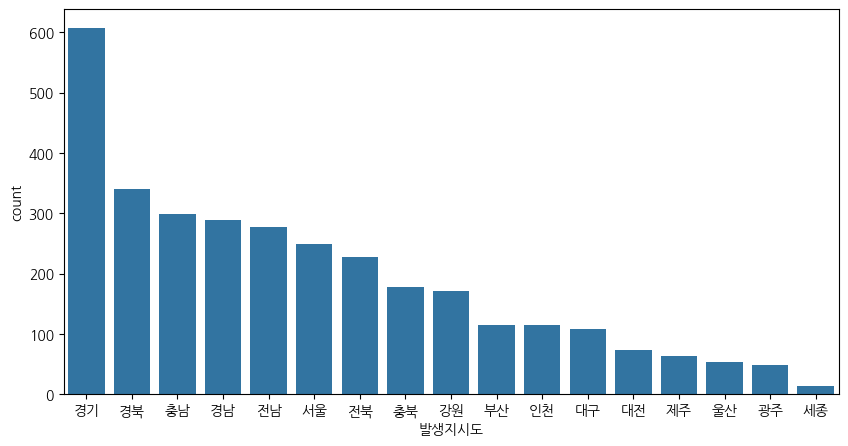

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=accident_df, x='발생지시도',
              order=accident_df['발생지시도'].value_counts().index)
plt.show()

### 요일별 교통사고 현황
* 어느 요일이 교통사고 많이 발생하는지 확인
* 월화수목금토일 순으로 x축 정렬

In [ ]:
day_list = ['월', '화', '수', '목', '금', '토', '일']

### 사고 유형별 교통사고 현황

In [23]:
fig = px.histogram(accident_df, x='사망자수', y='사고유형', # 사망자수 O, 건수 X
             orientation='h', text_auto=True)
fig.show()

In [24]:
fig = px.histogram(accident_df, x='사망자수', y='가해자법규위반', # 사망자수 O, 건수 X
             orientation='h', text_auto=True)
fig.show()

## 4.대전광역시 사망 교통사고 데이터 분석 및 시각화

### 대전 데이터 추출

In [25]:
dj_df = accident_df.query("발생지시도 == '대전'")
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 3 to 3124
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         74 non-null     int64         
 1   발생년월일       74 non-null     datetime64[ns]
 2   발생시간        74 non-null     int64         
 3   주야          74 non-null     object        
 4   요일          74 non-null     object        
 5   사망자수        74 non-null     int64         
 6   부상자수        74 non-null     int64         
 7   중상자수        74 non-null     int64         
 8   경상자수        74 non-null     int64         
 9   부상신고자수      74 non-null     int64         
 10  발생지시도       74 non-null     object        
 11  발생지시군구      74 non-null     object        
 12  사고유형_대분류    74 non-null     object        
 13  사고유형_중분류    74 non-null     object        
 14  사고유형        74 non-null     object        
 15  가해자법규위반     74 non-null     object        
 16  도로형태_대분류    74 non-null     obj

### 발생시간별 교통사고 사망자 현황

In [29]:
dj_df

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
3,2019,2019-01-01,19,야,화,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
43,2019,2019-01-07,18,야,월,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로내,승합차,보행자,991972.0,1812502.0,127.410575,36.309824
105,2019,2019-01-14,7,주,월,1,0,0,0,0,...,기타,신호위반,교차로,교차로부근,화물차,자전거,990556.0,1826775.0,127.394629,36.438487
114,2019,2019-01-15,4,야,화,1,0,0,0,0,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,994663.0,1814573.0,127.440536,36.328513
208,2019,2019-01-24,21,야,목,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,992948.0,1819982.0,127.421379,36.377267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2019,2019-12-01,20,야,일,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,996251.0,1813736.0,127.458234,36.320975
2988,2019,2019-12-05,19,야,목,1,0,0,0,0,...,횡단중,신호위반,교차로,교차로횡단보도내,승용차,보행자,992985.0,1827664.0,127.421722,36.446522
3018,2019,2019-12-09,20,야,월,1,0,0,0,0,...,기타,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,보행자,996766.0,1809644.0,127.463988,36.284085
3028,2019,2019-12-10,14,주,화,1,1,0,1,0,...,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,998108.0,1816444.0,127.478915,36.345394


In [27]:
#전국 19시에 가장 많은 교통사고 발생 -> 대전은
fig = px.bar(dj_df, x='사망자수', y='발생시간', orientation='h')
fig.show()

### 지역구별 교통사고 사망자 현황

In [30]:
fig = px.bar(dj_df, x='사망자수', y='발생지시군구', orientation='h')
fig.show()

### 월별 교통사고 현황

In [31]:
accident_df['발생월'] = accident_df['발생년월일'].dt.month
dj_df['발생월'] = dj_df['발생년월일'].dt.month
dj_df.head()

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생월
3,2019,2019-01-01,19,야,화,1,0,0,0,0,...,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,1
43,2019,2019-01-07,18,야,월,1,0,0,0,0,...,안전운전 의무 불이행,교차로,교차로내,승합차,보행자,991972.0,1812502.0,127.410575,36.309824,1
105,2019,2019-01-14,7,주,월,1,0,0,0,0,...,신호위반,교차로,교차로부근,화물차,자전거,990556.0,1826775.0,127.394629,36.438487,1
114,2019,2019-01-15,4,야,화,1,0,0,0,0,...,안전운전 의무 불이행,단일로,교량위,승용차,없음,994663.0,1814573.0,127.440536,36.328513,1
208,2019,2019-01-24,21,야,목,1,0,0,0,0,...,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,992948.0,1819982.0,127.421379,36.377267,1


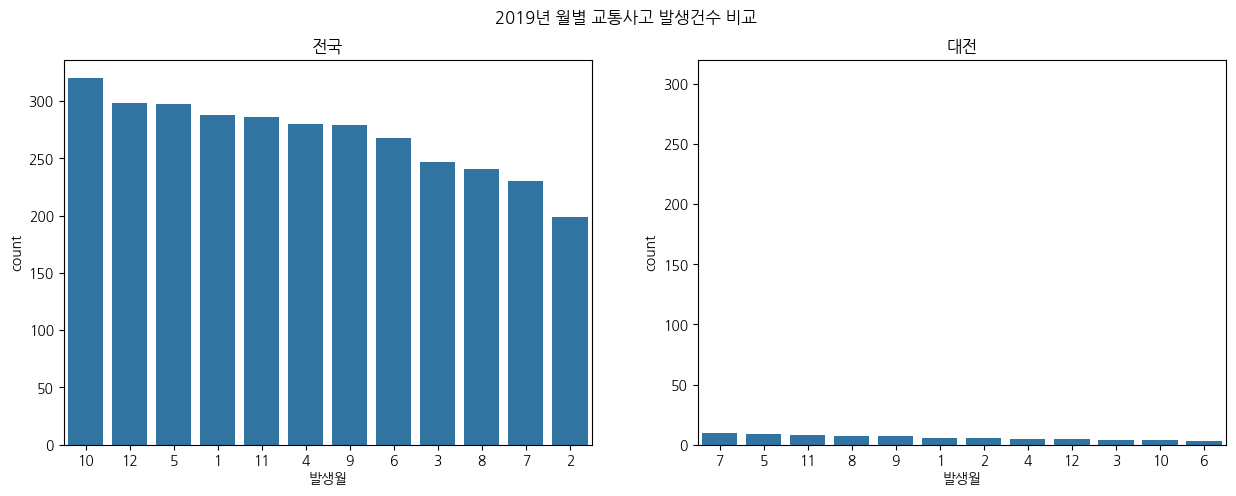

In [34]:
#월별 교통사고 전국 VS 대전

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle('2019년 월별 교통사고 발생건수 비교')

sns.countplot(data = accident_df, x = '발생월', ax = axes[0],
              order = accident_df['발생월'].value_counts().index)

axes[0].set_title('전국')

sns.countplot(data = dj_df, x = '발생월', ax = axes[1],
              order = dj_df['발생월'].value_counts().index)

axes[1].set_title('대전')
#비교하는 차트의 y축 고정하기
plt.ylim(0, accident_df['발생월'].value_counts().max())
plt.show()

## 5.지도를 활용해서 사망 교통사고 현황 분석

### 기본 지도 준비하기

In [35]:
map = folium.Map(location=[36.321655, 127.378953]) # 위도, 경도
map

### 대전광역시 사망 교통사고 위치 지도 시각화

In [36]:
# 사망사고 위치에 CircleMarker 표출
# CircleMarker 사이즈 = 사망자수 + 부상자수(중상자수 + 경상자수+부상신고자수)
# CircleMarker 클릭하면 popup 사고유형 표출

# CircleMarker 사이즈가 실수형 데이터만 취급
# 사망자수, 부상자수 컬럼 자료형을 실수형으로 형변환

dj_df = dj_df.astype({'사망자수': 'float', '부상자수':'float'})
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 3 to 3124
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         74 non-null     int64         
 1   발생년월일       74 non-null     datetime64[ns]
 2   발생시간        74 non-null     int64         
 3   주야          74 non-null     object        
 4   요일          74 non-null     object        
 5   사망자수        74 non-null     float64       
 6   부상자수        74 non-null     float64       
 7   중상자수        74 non-null     int64         
 8   경상자수        74 non-null     int64         
 9   부상신고자수      74 non-null     int64         
 10  발생지시도       74 non-null     object        
 11  발생지시군구      74 non-null     object        
 12  사고유형_대분류    74 non-null     object        
 13  사고유형_중분류    74 non-null     object        
 14  사고유형        74 non-null     object        
 15  가해자법규위반     74 non-null     object        
 16  도로형태_대분류    74 non-null     obj

### 사망자수 + 부상자수에 따른 CircleMarker 지도 표출

In [37]:
#1) 지도 준비
map = folium.Map(location=[36.321655, 127.378953]) # 위도, 경도

#2) CircleMarker 지도에 표출 -> for문을 이용해서 dj_df에 정보가 있을 때까지 지도에 add

for n in dj_df.index:
  # CircleMarker 사이즈
  cnt = dj_df['사망자수'][n] + dj_df['부상자수'][n]

  # 사고 위치 위도, 경도 추출
  lat = dj_df['위도'][n]
  lng = dj_df['경도'][n]

  # 지도에 add 하기
  folium.CircleMarker(location=[lat, lng], radius=cnt*10,
                      popup=dj_df['사고유형'][n],
                      color='red', fill_color='red').add_to(map)
map

### 대전광역시 사망교통사고 지도 시각화 저장

In [40]:
map.save('2019년 대전 사망교통사고 현황.html')